## Dataset Loading

In [1]:
# Import Necessary Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import scipy

In [3]:
# Importing the data
training_data_path="C:/Users/usatoleb/Desktop/Epita/Semester2/DSProduction/House-predictions/train.csv"
test_data_path="C:/Users/usatoleb/Desktop/Epita/Semester2/DSProduction/House-predictions/test.csv"
training_data=pd.read_csv(training_data_path)
test_data=pd.read_csv(test_data_path)

In [4]:
print(" Initial data set shape:" ,training_data.shape)
training_data.head()

 Initial data set shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Selection

<AxesSubplot:>

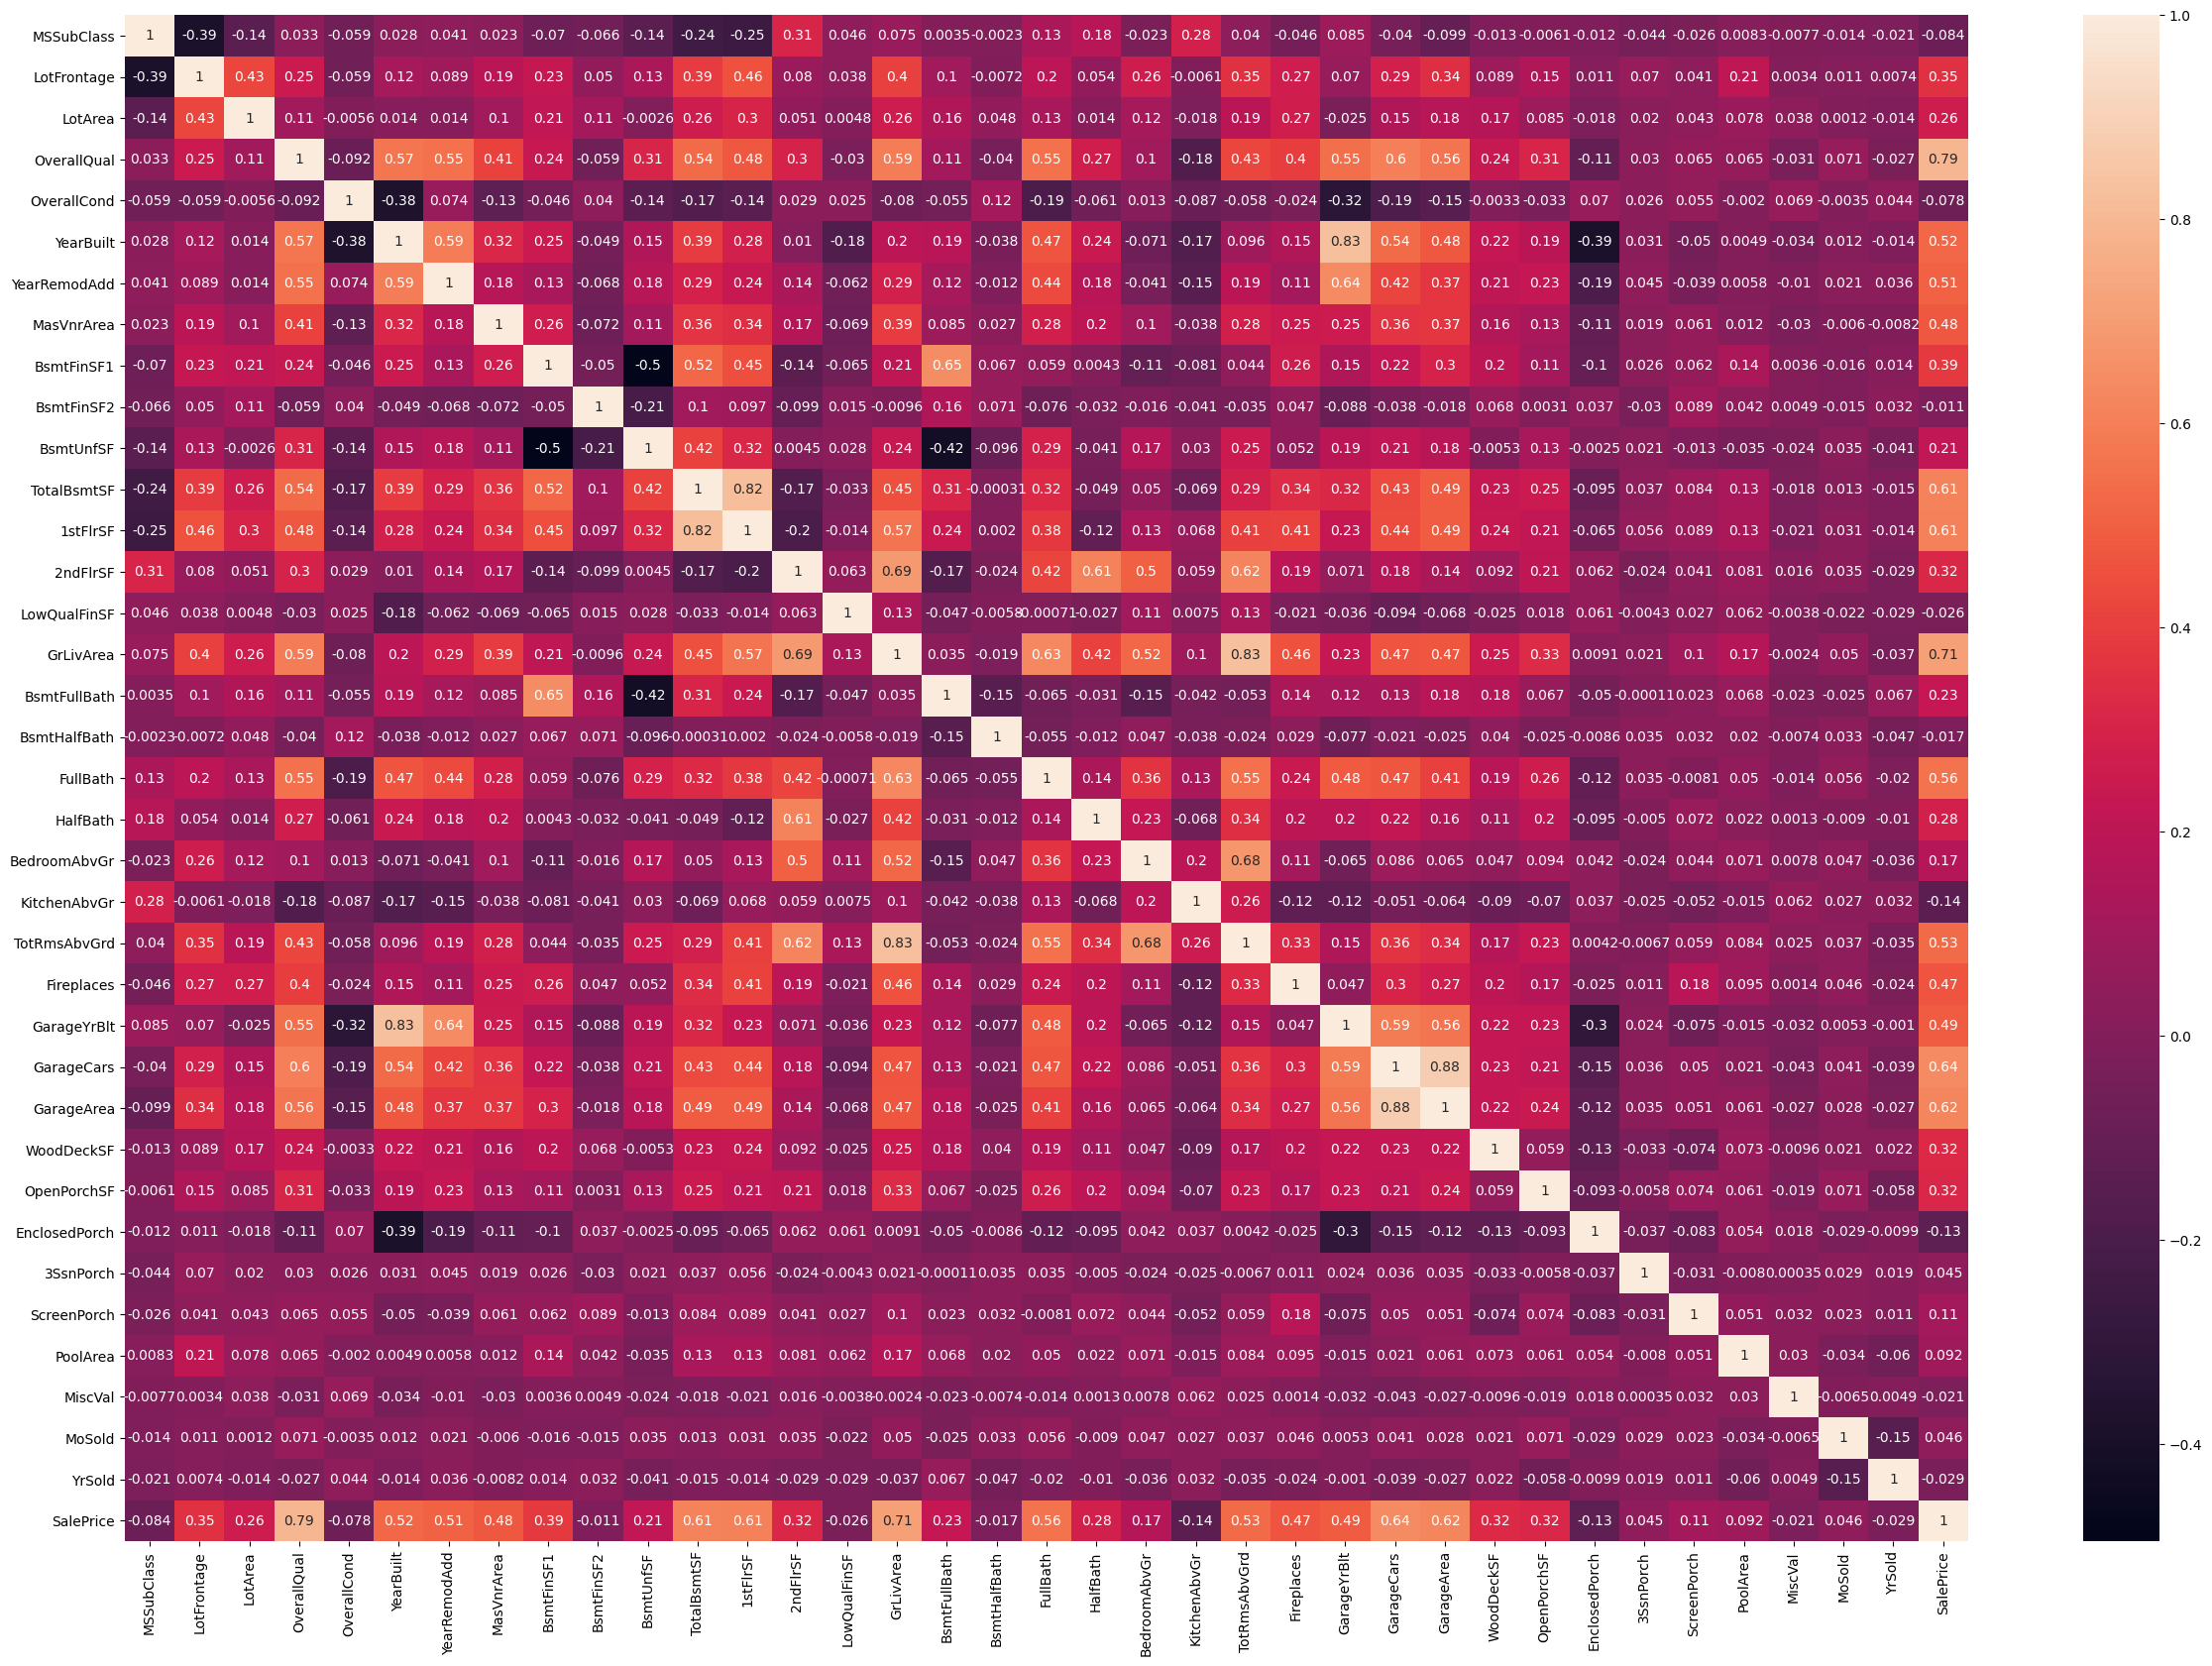

In [5]:
training_data.drop('Id',axis=1,inplace=True)
plt.figure(figsize=(30,20))
sns.heatmap(training_data.corr(),annot=True)

### Choice of Variables
#### Continuous
1. GrLivArea (Above grade (ground) living area square feet): Correlation of 0.71 with the target variable
2. GarageArea (Size of garage in square feet): Correlation of 0.62 with the target variable
3. TotalBsmtSF (Total square feet of basement area): Correlation of 0.79 with the target variable

#### Categorical
1. OverallQual: Rates the overall material and finish of the house
2. OverallCond: Rates the overall condition of the house
3. Neighborhood: Physical locations within Ames city limits
4. MSZoning: Identifies the general zoning classification of the sale.

In [6]:
# create a new dataframe based on the variables we selected 
selected_variables=['GrLivArea','GarageArea','TotalBsmtSF','OverallQual','OverallCond','Neighborhood','MSZoning']
X_data=training_data[selected_variables]
Y_data=training_data['SalePrice']
print("Features shape:",X_data.shape)
print("Target Variable Shape:",Y_data.shape)
print("Features null values:\n",X_data.isnull().sum())
print("Target Variable null values:\n",Y_data.isnull().sum())

Features shape: (1460, 7)
Target Variable Shape: (1460,)
Features null values:
 GrLivArea       0
GarageArea      0
TotalBsmtSF     0
OverallQual     0
OverallCond     0
Neighborhood    0
MSZoning        0
dtype: int64
Target Variable null values:
 0


## Feature Processing

C:\Users\usatoleb\miniconda3\envs\ml\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


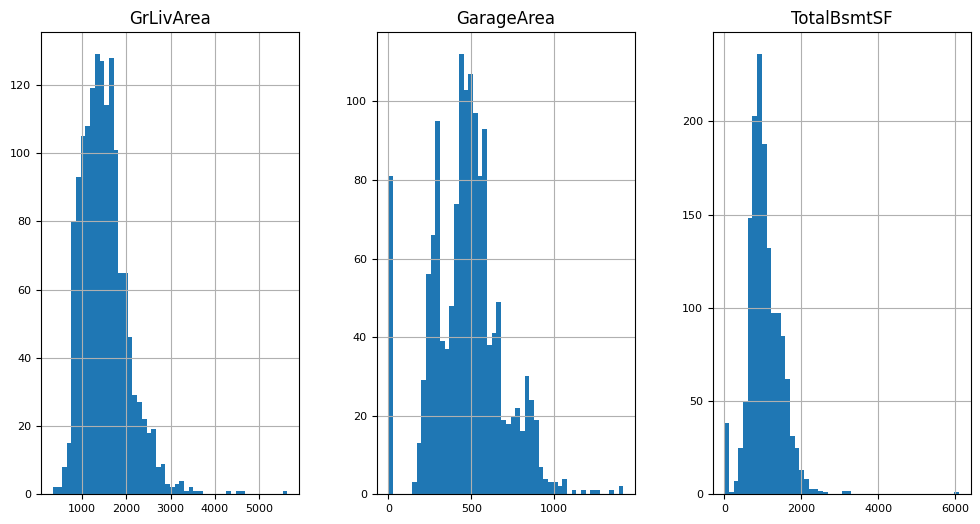

In [7]:
from scipy.stats import shapiro, kstest
# Studying the Distribution of the continuous variables
df_num = X_data[['GrLivArea','GarageArea','TotalBsmtSF']]
df_num.hist(figsize=(12, 6), bins=50, xlabelsize=8, ylabelsize=8,layout=(1,3))
plt.show()


In [8]:
# Shapiro-Wilk test on Ground Living Area
stat, p = shapiro(X_data['GrLivArea'])
print('Shapiro-Wilk Test on Ground Living Area:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Shapiro-Wilk test on Ground Living Area
stat, p = shapiro(X_data['GarageArea'])
print('Shapiro-Wilk Test on Garage Area:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Shapiro-Wilk test on Basement Surface

stat, p = shapiro(X_data['TotalBsmtSF'])
print('Shapiro-Wilk Test on Total Basement Surface:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test on Ground Living Area:
Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test on Garage Area:
Statistics=0.975, p=0.000
Sample does not look Gaussian (reject H0)
Shapiro-Wilk Test on Total Basement Surface:
Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


In [9]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.25,random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (1095, 7)
X_test shape: (365, 7)
y_train shape: (1095,)
y_test shape: (365,)


In [10]:
# Normalizing the continuous variables because they are not normally distributed
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
columns_list=['GrLivArea','GarageArea','TotalBsmtSF']
X_train[columns_list]=scaler.fit_transform(X_train[columns_list])
X_test[columns_list]=scaler.transform(X_test[columns_list])

C:\Users\usatoleb\AppData\Local\Temp\ipykernel_23696\3093306039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns_list]=scaler.fit_transform(X_train[columns_list])
C:\Users\usatoleb\miniconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\usatoleb\AppData\Local\Temp\ipykernel_23696\3093306039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [11]:
# Encoding the Categorical Variables
X_test.head()

,GrLivArea,GarageArea,TotalBsmtSF,OverallQual,OverallCond,Neighborhood,MSZoning
892,-0.879035,-1.014597,-0.003975,6,8,Sawyer,RL
1105,2.069972,1.113997,0.906598,8,5,NoRidge,RL
413,-0.954942,-0.558469,-0.118923,5,6,OldTown,RM
522,0.251987,-0.273390,-0.127939,6,7,BrkSide,RM
1036,0.168489,2.064262,1.260459,9,5,Timber,RL


In [12]:
X_train.head()

,GrLivArea,GarageArea,TotalBsmtSF,OverallQual,OverallCond,Neighborhood,MSZoning
1023,-0.051643,-0.192617,0.642893,7,5,Blmngtn,RL
810,-0.421692,0.030695,-0.046799,6,6,NWAmes,RL
1384,-0.518474,-0.938576,-1.128667,6,5,Edwards,RL
626,-0.207253,-0.910068,-0.186540,5,5,NAmes,RL
813,-0.169300,-0.838798,0.859266,6,6,NAmes,RL


In [13]:
# One Hot Encoding the Categorical Ordinal Variables

# Neighborhood
one_hot_encoded_neighborhood_training=pd.get_dummies(X_train['Neighborhood'],prefix='neighborhood_is')
X_train.drop('Neighborhood',axis=1,inplace=True)
X_train=pd.concat([X_train,one_hot_encoded_neighborhood_training],axis=1)

one_hot_encoded_neighborhood_test=pd.get_dummies(X_test['Neighborhood'],prefix='neighborhood_is')
X_test.drop('Neighborhood',axis=1,inplace=True)
X_test=pd.concat([X_test,one_hot_encoded_neighborhood_test],axis=1)

# MSZoning
one_hot_encoded_zoning_training=pd.get_dummies(X_train['MSZoning'],prefix='zoning_is')
X_train.drop('MSZoning',axis=1,inplace=True)
X_train=pd.concat([X_train,one_hot_encoded_zoning_training],axis=1)

one_hot_encoded_zoning_test=pd.get_dummies(X_test['MSZoning'],prefix='zoning_is')
X_test.drop('MSZoning',axis=1,inplace=True)
X_test=pd.concat([X_test,one_hot_encoded_zoning_test],axis=1)

C:\Users\usatoleb\miniconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
X_train.head(5)

,GrLivArea,GarageArea,TotalBsmtSF,OverallQual,OverallCond,neighborhood_is_Blmngtn,neighborhood_is_Blueste,neighborhood_is_BrDale,neighborhood_is_BrkSide,neighborhood_is_ClearCr,...,neighborhood_is_SawyerW,neighborhood_is_Somerst,neighborhood_is_StoneBr,neighborhood_is_Timber,neighborhood_is_Veenker,zoning_is_C (all),zoning_is_FV,zoning_is_RH,zoning_is_RL,zoning_is_RM
1023,-0.051643,-0.192617,0.642893,7,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
810,-0.421692,0.030695,-0.046799,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1384,-0.518474,-0.938576,-1.128667,6,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
626,-0.207253,-0.910068,-0.186540,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
813,-0.169300,-0.838798,0.859266,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
X_test.head(5)

,GrLivArea,GarageArea,TotalBsmtSF,OverallQual,OverallCond,neighborhood_is_Blmngtn,neighborhood_is_Blueste,neighborhood_is_BrDale,neighborhood_is_BrkSide,neighborhood_is_ClearCr,...,neighborhood_is_SawyerW,neighborhood_is_Somerst,neighborhood_is_StoneBr,neighborhood_is_Timber,neighborhood_is_Veenker,zoning_is_C (all),zoning_is_FV,zoning_is_RH,zoning_is_RL,zoning_is_RM
892,-0.879035,-1.014597,-0.003975,6,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1105,2.069972,1.113997,0.906598,8,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
413,-0.954942,-0.558469,-0.118923,5,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
522,0.251987,-0.273390,-0.127939,6,7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1036,0.168489,2.064262,1.260459,9,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## 4. Model Training

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr

LinearRegression()

## 5. Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)


In [ ]:
y_test=y_test.to_numpy()
y_pred=y_pred.to_numpy()

In [38]:
y_pred=np.delete(y_pred,134)
y_test=np.delete(y_test,134)

In [45]:
compute_rmsle(y_test, y_pred, 2)

0.17

A low RMSLE (close to 0) indicates that the model's predictions are very close to the true values on a logarithmic scale.